# Introdução

Este projeto consiste na análise exploratória e modelagem preditiva dos preços de aluguel de propriedades em Nova York. Uma empresa foi designada para trabalhar em colaboração com um cliente que está desenvolvendo uma plataforma de aluguéis temporários na cidade de Nova York. O objetivo principal é criar um modelo de previsão de preços com base nos dados fornecidos pelo maior concorrente do cliente. A análise exploratória dos dados fornecerá insights valiosos sobre padrões, tendências e características do mercado de aluguel em Nova York. Posteriormente, a equipe desenvolverá e avaliará modelos preditivos para determinar os preços de aluguel com base em diversas variáveis relevantes, como localização, tipo de propriedade e disponibilidade. O desempenho dos modelos será avaliado utilizando métricas adequadas para problemas de regressão.

# Configurando o Ambiente de Trabalho

Importando bibliotecas, carregando dados.

In [1]:
#Pandas
import pandas as pd

#Numpy
import numpy as np

#Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

#Data Transformation & Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importando a base de dados
data = pd.read_csv('/content/alugueis_ny.csv', sep=',')

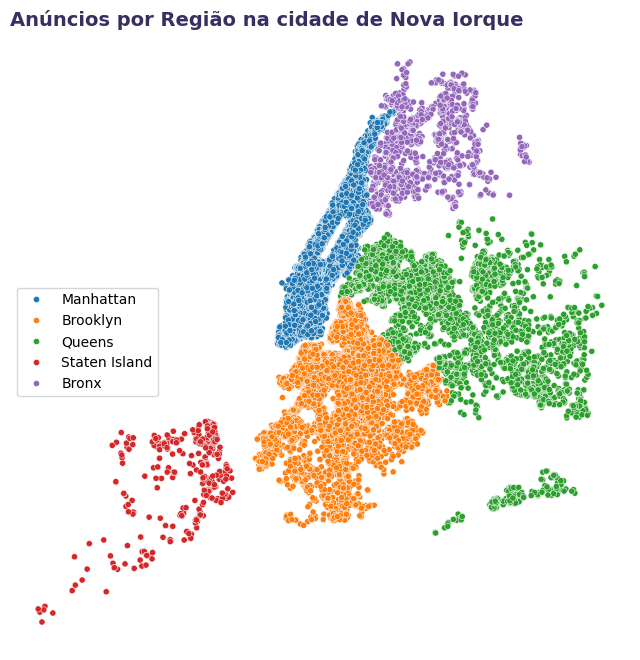

In [3]:
# @title
data.rename(columns={'bairro_group':'regiao'}, inplace=True)

plt.figure(figsize=(8,8))
ax = sns.scatterplot(x='longitude', y='latitude', hue='regiao',s=20, data=data)
ax.set_title('Anúncios por Região na cidade de Nova Iorque', loc='left', fontweight='bold', fontsize=14, color='#363062')
ax.set(xlabel=None,ylabel=None, xticklabels=[], yticklabels=[])
ax.legend(loc='center left')

ax.tick_params(left=False, bottom=False)
sns.despine(left=True, bottom=True)

Este é o mapa de Nova Iorque de acordo com os anúncios que temos no nosso conjunto de dados. A partir de cada anúncio, conseguimos separar cada região. Posteriormente, vamos nos aprofundar nestes dados para extrair mais insights e criar hipóteses sobre cada possibilidade.

# Exploração

Vamos visualizar os dados para compreender a qualidade do conjunto de dados e identificar possíveis problemas. Vamos comentar os insights reunidos a partir de cada código, com nossas hipóteses.

In [4]:
#Verificando as cinco primeiras linhas do dataset
pd.options.display.max_columns = None
data.head()

,id,nome,host_id,host_name,regiao,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


- **Coluna "host_name" não relevante:** A coluna "host_name" não é relevante para o nosso modelo de previsão de preços de aluguel de imóveis em Nova Iorque. Essa informação não tem impacto direto no preço do aluguel e, portanto, podemos removê-la do dataset.

- **Features Identificadoras "id" e "host_id":** As features "id" e "host_id" são identificadores únicos atribuídos a cada anúncio e a cada host, respectivamente. Essas informações também não contribuem diretamente para a previsão dos preços de aluguel. Portanto, podemos remover essas colunas do dataset.

- **Remoção da Coluna "nome":** A coluna "nome" contém o nome do anúncio do imóvel. Embora essa informação possa ser útil para entender a estratégia de marketing dos anunciantes, não é claro se ela tem uma correlação direta com o preço do aluguel. Para treino do modelo, iremos removê-la, mas posteriormente vamos realizar uma análise mais aprofundada para verificar se existe alguma relação entre o preço do aluguel e o nome do anúncio.

- **Remoção da Coluna "ultima_review":** Considerando o escopo e os objetivos do nosso modelo de previsão de preços de aluguel, determinamos que a coluna "ultima_review" não contribui significativamente para a previsão dos preços de aluguel. Como essa coluna apenas indica a data da última avaliação do local e não possui uma correlação direta com o preço do aluguel, decidimos remover essa informação do dataset.

Continuaremos nossa análise exploratória de dados para descobrir outros insights valiosos que possam nos ajudar a entender melhor o mercado imobiliário de Nova Iorque e a desenvolver um modelo de previsão de preços ainda mais robusto.

## Verificando Tipos de Dados

Vamos verificar as características (features) deste conjunto de dados, identificando seus tipos.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   regiao                         48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

- **Codificação de Colunas Categóricas:** As colunas "regiao",  "room_type" e "bairro" são categóricas, ou seja, contêm categorias como "Manhattan", "Brooklyn", "Bronx", etc., e "Entire home/apt", "Private room", "Shared room", etc., respectivamente. Para melhorar o desempenho do nosso modelo, podemos converter essas colunas categóricas em colunas numéricas.

## Dados Estatísticos

Aqui, verificaremos os dados estatísticos das features do nosso conjunto de dados.

In [6]:
data.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,23.274758,1.373251,7.144005,112.776169
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.156625,20.510741,44.550991,1.680453,32.952855,131.618692
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Com estes dados estatísticos, observei a presença de outliers nas features "price", "minimo_noites", "numero_de_reviews" (e, consequentemente, "reviews_por_mes") e "calculado_host_listings_count".

É importante notar que, apesar da identificação desses valores atípicos, não parece haver evidências de erros ou anomalias nos dados. Na verdade eles podem representar casos legítimos e válidos, como por exemplo em "price", que apesar da mediana do preço de aluguel ser 106, é possível encontrar locais com aluguéis mais elevados, como 10.000. Esses casos podem refletir a presença de propriedades de luxo ou características únicas que justificam valores extremos. O mesmo se aplica para "minimo_noites", pois a presença de valores elevados pode ser explicada por propriedades que têm requisitos específicos de estadia mínima, como estadias prolongadas ou locações sazonais.

## Dados Faltantes
Agora vamos verificar a presença de dados faltantes em nosso conjunto de dados.

In [7]:
#Verificando dados faltantes
data.isnull().sum()/data.shape[0]

id                               0.000000
nome                             0.000327
host_id                          0.000000
host_name                        0.000430
regiao                           0.000000
bairro                           0.000000
latitude                         0.000000
longitude                        0.000000
room_type                        0.000000
price                            0.000000
minimo_noites                    0.000000
numero_de_reviews                0.000000
ultima_review                    0.205588
reviews_por_mes                  0.205588
calculado_host_listings_count    0.000000
disponibilidade_365              0.000000
dtype: float64

- Os dados faltantes em "ultima_review" e "reviews_por_mes" fazem um certo sentido, pois se o local nunca foi alugado (ou foi por poucas vezes), é possível que o mesmo nunca tenha recebido nenhuma review, e consequentemente não terá nem uma última review, nem uma média de reviews por mês;
- Considerando que a quantidade de reviews por mês pode ser um indicador importante de popularidade e demanda por um determinado local, optamos por manter essa coluna no dataset e tratar os dados faltantes substituindo-os por zero. Por outro lado, decidimos remover a coluna "ultima_review", como discutido anteriormente, pois sua ausência de dados não traz insights relevantes para o modelo de previsão de preços de aluguel.

## Verificando features categóricas

Nesta seção, vamos criar gráficos para representar os dados nas características categóricas do nosso conjunto de dados, a fim de obter uma compreensão mais detalhada de cada característica e de seu conteúdo.

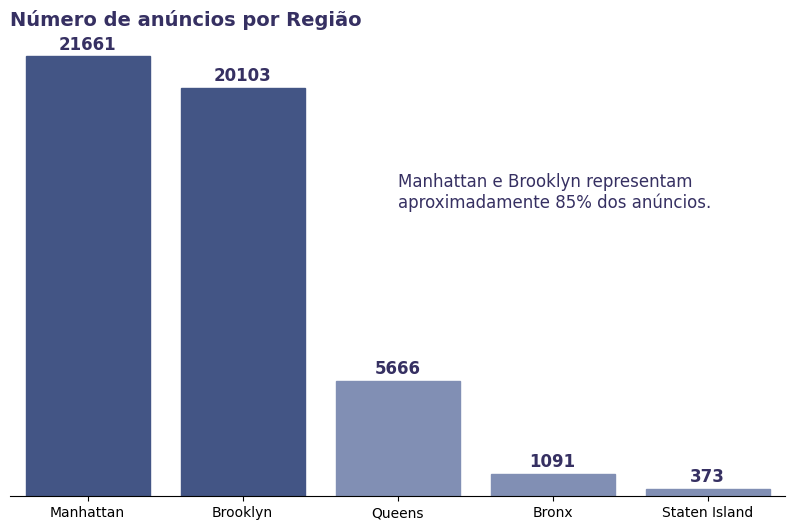

In [8]:
# @title
#Contando ocorrências em 'bairro_group'
data_count = data['regiao'].value_counts().reset_index(name='count')

#Ordenando as regiões de forma decrescente
data_count = data_count.sort_values(by='count', ascending=False)

#Calculando a porcentagem em relação ao total
total_count = data_count['count'].sum()
data_count['percentage'] = (data_count['count'] / total_count) * 100

#Criando uma nova coluna para os rótulos de texto
data_count['text'] = data_count.apply(lambda row: f"{row['count']} ({row['percentage']:.2f}%)", axis=1)

#Criando o gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=data_count, x='index', y='count', errorbar=None, color='#363062')
ax.bar_label(ax.containers[0], fontsize=12, padding=2, fontweight='bold', color='#363062');

#Personalizando o gráfico
ax.set_title('Número de anúncios por Região', loc='left', fontweight='bold', fontsize=14, color='#363062')
ax.set(xlabel=None,ylabel=None, yticklabels=[])
for bar in ax.patches: #Destacando cores
    if bar.get_height() > 10000:
        bar.set_color('#435585')
    else:
        bar.set_color('#818FB4')

texto_insight = 'Manhattan e Brooklyn representam\naproximadamente 85% dos anúncios.'
ax.text(0.5, 0.7, texto_insight, ha='left', va='top', transform=ax.transAxes, fontsize=12, color='#363062')

sns.despine(left=True)
ax.tick_params(left=False)

#Exibindo o gráfico
plt.show()

As regiões de Manhattan e Brooklyn representam, respectivamente, 44,30% e 41,12% de todos os anúncios, seguidos por Queens (11,59%), Bronx (2,23%) e Staten Island (0,76%).

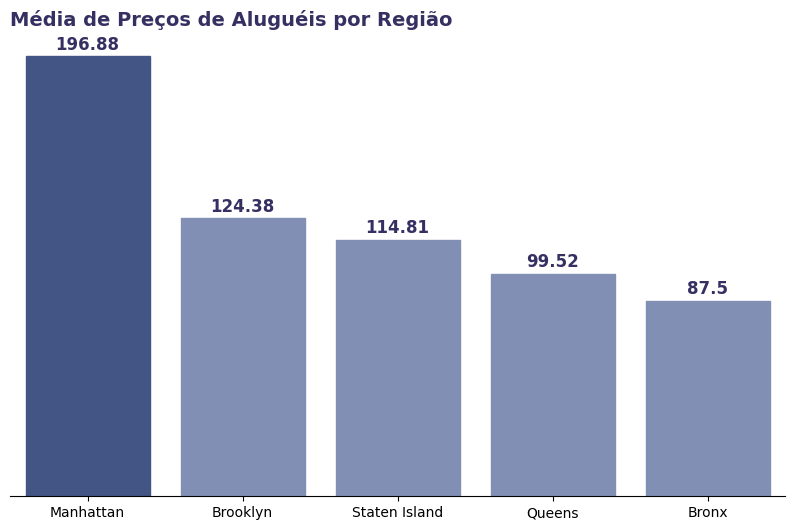

In [9]:
# @title
#Calculando a média do preço (price) para cada região
data_mean_price = data.groupby('regiao')['price'].mean().round(2).reset_index()

#Ordenando as regiões de forma decrescente
data_mean_price = data_mean_price.sort_values(by='price', ascending=False)

#Criando o gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=data_mean_price, x='regiao', y='price', estimator="sum", errorbar=None, color='#363062')
ax.bar_label(ax.containers[0], fontsize=12, padding=2, fontweight='bold', color='#363062');

#Personalizando o gráfico
ax.set_title('Média de Preços de Aluguéis por Região', loc='left', fontweight='bold', fontsize=14, color='#363062')
ax.set(xlabel=None,ylabel=None, yticklabels=[])
for bar in ax.patches: #Destacando cores
    if bar.get_height() > 150:
        bar.set_color('#435585')
    else:
        bar.set_color('#818FB4')

sns.despine(left=True)
ax.tick_params(left=False)
ax.grid(False, axis='both')

#Exibindo o gráfico
plt.show()

A região de Manhattan possui a maior média de valores de aluguéis. Todas as regiões parecem ter uma relação entre valor médio de anúncio e o número de anúncios em si, com exceção de Staten Island, que possui poucos anúncios (0,76%), mas uma média de valor de alguel mais elevada que Queens e Bronx, e quase igual à Brooklyn, que representa grande parcela (41,12%) dos anúncios.

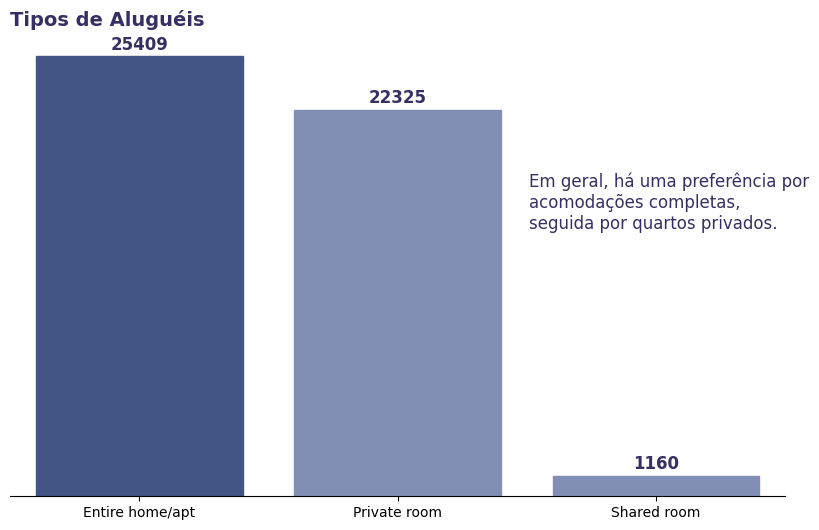

In [10]:
# @title
#Contando ocorrências em 'room_type'
data_count = data['room_type'].value_counts().reset_index(name='count')

#Ordenando as regiões de forma decrescente
data_count = data_count.sort_values(by='count', ascending=False)

#Criando o gráfico com Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=data_count, x='index', y='count', estimator="sum", errorbar=None, color='#363062')
ax.bar_label(ax.containers[0], fontsize=12, padding=2, fontweight='bold', color='#363062');


#Personalizando o gráfico
ax.set_title('Tipos de Aluguéis', loc='left', fontweight='bold', fontsize=14, color='#363062')
ax.set(xlabel=None,ylabel=None, yticklabels=[])
for bar in ax.patches: #Destacando cores
    if bar.get_height() > 25000:
        bar.set_color('#435585')
    else:
        bar.set_color('#818FB4')

texto_insight = 'Em geral, há uma preferência por\nacomodações completas,\nseguida por quartos privados.'
ax.text(0.67, 0.7, texto_insight, ha='left', va='top', transform=ax.transAxes, fontsize=12, color='#363062')

sns.despine(left=True)
ax.tick_params(left=False)

#Exibindo o gráfico
plt.show()

- A maioria dos anúncios representa o aluguel do espaço inteiro, seguidos por um quarto privado. Opções de quartos compartilhados também são anunciadas, embora em escala muito menor.

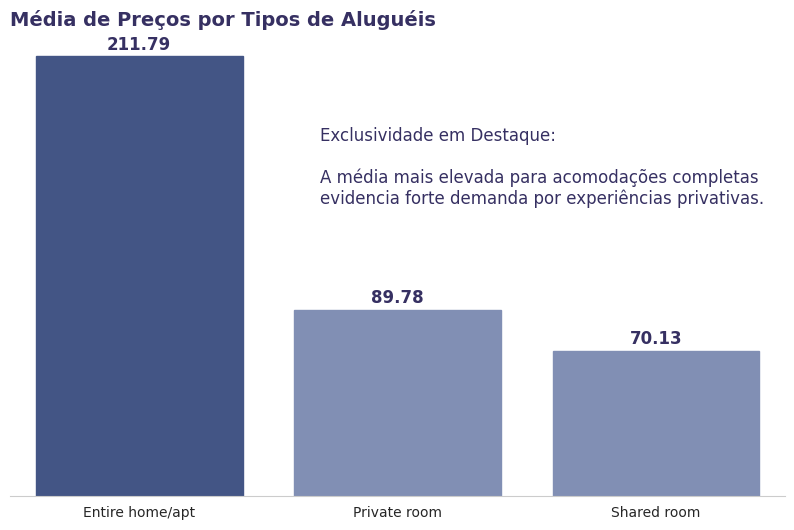

In [11]:
# @title
#Calculando a média do preço
data_mean_price_room_type = data.groupby('room_type')['price'].mean().round(2).reset_index()

#Ordenando os tipos de aluguel de forma decrescente
data_mean_price_room_type = data_mean_price_room_type.sort_values(by='price', ascending=False)

sns.set_style("whitegrid")

#Criando o gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=data_mean_price_room_type, x='room_type', y='price', estimator="sum", errorbar=None, color='#363062')
ax.bar_label(ax.containers[0], fontsize=12, padding=2, fontweight='bold', color='#363062');

#Personalizando o gráfico
ax.set_title('Média de Preços por Tipos de Aluguéis', loc='left', fontweight='bold', fontsize=14, color='#363062')
ax.set(xlabel=None,ylabel=None, yticklabels=[])
for bar in ax.patches: #Destacando cores
    if bar.get_height() > 200:
        bar.set_color('#435585')
    else:
        bar.set_color('#818FB4')

texto_insight = 'Exclusividade em Destaque:\n\nA média mais elevada para acomodações completas\nevidencia forte demanda por experiências privativas.'
ax.text(0.4, 0.8, texto_insight, ha='left', va='top', transform=ax.transAxes, fontsize=12, color='#363062')

sns.despine(left=True)
ax.tick_params(left=False)
ax.grid(False, axis='both')

#Exibindo o gráfico
plt.show()

Destaque para Exclusividade: A média de $211,79 para 'Entire home/apt' ressalta a valorização de experiências completas e privativas. Esta preferência evidencia a demanda por acomodações exclusivas, indicando uma tendência de busca por conforto e privacidade entre os anunciantes.

## Correlação entre variáveis

A seguir, apresentamos um heatmap que ilustra a correlação entre as variáveis do conjunto de dados. Esse gráfico nos permite visualizar a força e a direção das relações entre as diferentes características dos imóveis para aluguel em Nova Iorque.

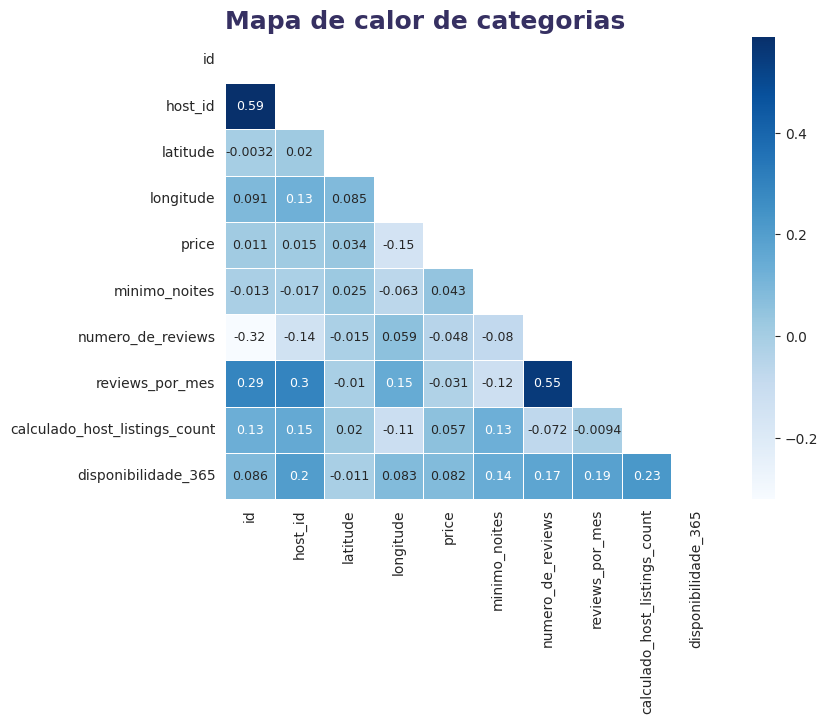

In [12]:
# @title
#Verificando correlação das features
plt.figure(figsize=(8, 6))
correlation_matrix = data.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='Blues', linewidths=0.5,
            annot_kws={"size": 9})
plt.title('Mapa de calor de categorias', loc='left', fontsize=18, fontweight='bold', color='#363062')
plt.grid(False)
plt.show()

**Correlações Identificadas**

Após analisar o heatmap de correlação entre as variáveis do dataset, destacamos duas correlações um pouco mais significativas:

- **host_id com id:** Apresenta uma correlação moderada de 0.59. Essa correlação faz sentido, pois alguns hosts podem ter vários imóveis listados, refletindo-se em uma relação positiva entre essas variáveis. No entanto, como ambas as colunas serão removidas do dataset, essa correlação não será relevante para o modelo.

- **reviews_por_mes com numero_de_reviews:** Apresenta uma correlação moderada de 0.55. Essa correlação sugere que propriedades com mais avaliações tendem a ter uma média de reviews por mês maior. Isso pode ser importante para o modelo, pois indica a popularidade e a demanda por um determinado local. No entanto, devemos considerar que essa correlação não implica causalidade, e outras variáveis podem influenciar a quantidade de reviews por mês.

Apesar de não encontrarmos correlações fortes, é importante ressaltar que o heatmap continua sendo uma ferramenta valiosa para identificar possíveis padrões e relações entre as variáveis, fornecendo insights úteis para a análise e o desenvolvimento do modelo preditivo.


# Manipulação de dados

Nesta seção, vamos colocar em prática as etapas de pré-processamento de dados discutidas anteriormente. Isso inclui remover colunas irrelevantes para o modelo, lidar com valores faltantes, converter colunas categóricas em numéricas, entre outras transformações necessárias. Nosso objetivo é preparar os dados de forma adequada para a análise exploratória e para a construção do modelo de previsão de preços de aluguel de imóveis em Nova Iorque.

### Remoção de colunas

Nesta etapa, vamos eliminar as colunas que não são relevantes para nossa análise e que não serão úteis para o modelo de machine learning.

In [13]:
#Removendo features desnecessárias
columns_to_drop = ['nome', 'host_name', 'host_id', 'id', 'ultima_review']
data = data.drop(columns_to_drop, axis=1)

### Tratando dados nulos

Nesta etapa, como discutido anteriormente, vamos transformar os dados nulos em "reviews_por_mes" em 0.

In [14]:
#Transformando dados nulos em 0
data['reviews_por_mes'].fillna(0, inplace=True)

### One-Hot Encoding

Nesta parte vamos realizar o processo de one-hot encoding para transformar as colunas categóricas em colunas separadas, onde cada coluna representa uma categoria única. As categorias escolhidas para essa transformação são baseadas nas colunas "regiao", "room_type" e "bairro". Este processo facilitará a análise e modelagem dos dados, assim o modelo de machine learning pode ser mais eficaz.

In [15]:
#Dividindo os dados em conjuntos de treinamento e teste
X = data.drop('price', axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
#Criando o OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')

In [17]:
#Criando o Pipeline
categorical_processing = Pipeline(steps=[('ohe', ohe)])

In [18]:
#Criando a função para aplicação do One Hot Encoding
preprocessing = ColumnTransformer(transformers=[('categorical', categorical_processing, ['regiao', 'room_type', 'bairro'])],
                                  remainder='passthrough')

In [19]:
#Ajusta e transforma os dados de treinamento usando o pipeline de pré-processamento
#Isso aplica o one-hot encoding nas colunas categóricas e deixa as outras colunas inalteradas
X_train = preprocessing.fit_transform(X_train)

In [20]:
#Transforma os dados de teste usando as mesmas etapas de pré-processamento dos dados de treinamento
#Isso garante consistência entre os conjuntos de dados de treinamento e teste
X_test = preprocessing.transform(X_test)

In [21]:
#Exibe a forma dos dados de treinamento transformados
X_train.shape

(39115, 233)

In [22]:
#Exibe a forma dos dados de teste transformados
X_test.shape

(9779, 233)

# Modelos Preditivos

Neste projeto, optei por testar três modelos de regressão: Elastic Net, Gradient Boosting Regressor e Random Forest Regressor. Abaixo, explico o motivo da escolha desses modelos específicos:

- **Elastic Net**: O Elastic Net é uma técnica de regularização que combina as penalidades do L1 (Lasso) e do L2 (Ridge) na função de custo. Optei por incluí-lo na análise devido à sua capacidade de lidar com a multicolinearidade entre as variáveis explicativas. Além disso, o Elastic Net é eficaz na seleção de variáveis importantes, o que pode ser útil no contexto para identificar os principais fatores que influenciam os preços dos aluguéis.


- **Gradient Boosting Regressor**: O Gradient Boosting Regressor é um modelo de ensemble que combina várias árvores de decisão fracas para formar um modelo forte. Escolhi este modelo devido à sua capacidade de lidar com dados heterogêneos e sua habilidade de capturar relacionamentos complexos entre as variáveis independentes e dependentes. Além disso, o Gradient Boosting Regressor tende a ter um bom desempenho em problemas de regressão, mesmo em conjuntos de dados com muitas observações e variáveis.


- **Random Forest Regressor**: O Random Forest Regressor é outro modelo de ensemble baseado em árvores de decisão. Optei por incluí-lo na análise devido à sua capacidade de lidar com dados não lineares e com uma grande quantidade de variáveis preditoras. Além disso, o Random Forest Regressor é robusto a overfitting e é menos sensível a valores atípicos em comparação com outros modelos de regressão.

Em suma, escolhi os três modelos em questão para testar no projeto devido às suas características e capacidades que se alinham com os requisitos e desafios específicos do problema.

### Teste dos Modelos

Nesta seção, vamos aplicar os três modelos escolhidos (Elastic Net, Gradient Boosting Regressor e Random Forest Regressor) para realizar a predição de preços, e verificar seus respectivos resultados.

**Elastic Net**

In [23]:
#Criando uma cópia dos conjuntos de dados, para teste com o Elastic Net
X_train_elastic = X_train.copy()
X_test_elastic = X_test.copy()
y_train_elastic = y_train.copy()
y_test_elastic = y_test.copy()

In [24]:
#Inicializando e treinando o modelo
elastic_net = ElasticNet(alpha=0.5, l1_ratio=0.5)
elastic_net.fit(X_train_elastic, y_train_elastic)

#Realizando previsões
y_pred_elastic = elastic_net.predict(X_test_elastic)

#Avaliação do modelo
mae = mean_absolute_error(y_test_elastic, y_pred_elastic)
mse = mean_squared_error(y_test_elastic, y_pred_elastic)
rmse = mean_squared_error(y_test_elastic, y_pred_elastic, squared=False)
r2 = r2_score(y_test_elastic, y_pred_elastic)

#Exibindo as métricas de avaliação
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

MAE: 71.08055971410802
MSE: 45533.01658129721
RMSE: 213.3846681026948
R²: 0.08762569130556719


**Gradient Boosting Regressor**

In [25]:
#Criando uma cópia dos conjuntos de dados, para teste com o Gradient Boosting Regressor
X_train_gbr = X_train.copy()
X_test_gbr = X_test.copy()
y_train_gbr = y_train.copy()
y_test_gbr = y_test.copy()

In [26]:
#Inicializando e treinando o modelo
gradient_boosting = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gradient_boosting.fit(X_train_gbr, y_train_gbr)

#Realizando previsões
y_pred_gbr = gradient_boosting.predict(X_test_gbr)

#Avaliação do modelo
mae = mean_absolute_error(y_test_gbr, y_pred_gbr)
mse = mean_squared_error(y_test_gbr, y_pred_gbr)
rmse = mean_squared_error(y_test_gbr, y_pred_gbr, squared=False)
r2 = r2_score(y_test_gbr, y_pred_gbr)

#Exibindo as métricas de avaliação
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

MAE: 63.01339295151255
MSE: 43250.7570765124
RMSE: 207.96816361287705
R²: 0.13335679137932432


**Random Forest Regressor**

In [27]:
#Criando uma cópia dos conjuntos de dados, para teste com o Random Forest Regressor
X_train_rfr = X_train.copy()
X_test_rfr = X_test.copy()
y_train_rfr = y_train.copy()
y_test_rfr = y_test.copy()

In [28]:
#Inicializando e treinando o modelo
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train_rfr, y_train_rfr)

#Realizando previsões
y_pred_rfr = random_forest.predict(X_test_rfr)

#Avaliação do modelo
mae = mean_absolute_error(y_test_rfr, y_pred_rfr)
mse = mean_squared_error(y_test_rfr, y_pred_rfr)
rmse = mean_squared_error(y_test_rfr, y_pred_rfr, squared=False)
r2 = r2_score(y_test_rfr, y_pred_rfr)

#Exibindo as métricas de avaliação
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

MAE: 66.38949892627058
MSE: 55264.32116217404
RMSE: 235.0836471602694
R²: -0.10736671104976825


### Interpretando os resultados dos modelos

Com base na análise dos resultados, optamos por seguir com o modelo de **Gradient Boosting Regressor**. Este modelo demonstrou o melhor desempenho em termos de explicação da variação dos dados (R² de 0.1334) e apresentou as métricas de erro mais baixas entre os três modelos avaliados. Isso sugere que o Gradient Boosting Regressor tem uma capacidade superior de predição em comparação com os outros modelos.

# Perguntas desafio

## Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?

*Para responder esta questão, idealmente teríamos mais informações, pois o capital do investidor pode fazer diferença na decisão final.*

*Para a hipótese em questão, vou assumir que o capital não é um problema, e que o investidor possui capital para investir em qualquer lugar da cidade. Desta forma, vou analisar de forma objetiva qual é o local que poderia trazer mais retorno ao investidor.*

*Neste caso, vou utilizar uma base de dados sobre vendas de imóveis em Nova Iorque (de 2019, assim como na database do desafio), disponibilizada pelo departamento financeiro da cidade de Nova Iorque (New York City Department of Finance) - https://www.nyc.gov/site/finance/property/property-annualized-sales-update.page*

In [29]:
#Importando a base
data_ny = pd.read_excel('/content/2019_citywide_sale.xlsx', skiprows=5)

In [30]:
data_ny.head()

,BOROUGH,BUILDING CLASS CATEGORY,NUMBER OF SALES,MINIMUM SALE PRICE,AVERAGE SALE PRICE,MEDIAN SALE PRICE,MAXIMUM SALE PRICE
0,Manhattan,01 ONE FAMILY DWELLINGS,101,375000,9256384,7200000,77100000
1,Manhattan,02 TWO FAMILY DWELLINGS,74,425000,5454151,3925000,25500000
2,Manhattan,03 THREE FAMILY DWELLINGS,42,531527,4400861,2375000,24000000
3,Bronx,01 ONE FAMILY DWELLINGS,1019,200000,548758,485000,5000000
4,Bronx,02 TWO FAMILY DWELLINGS,1364,200000,596455,600000,2400000


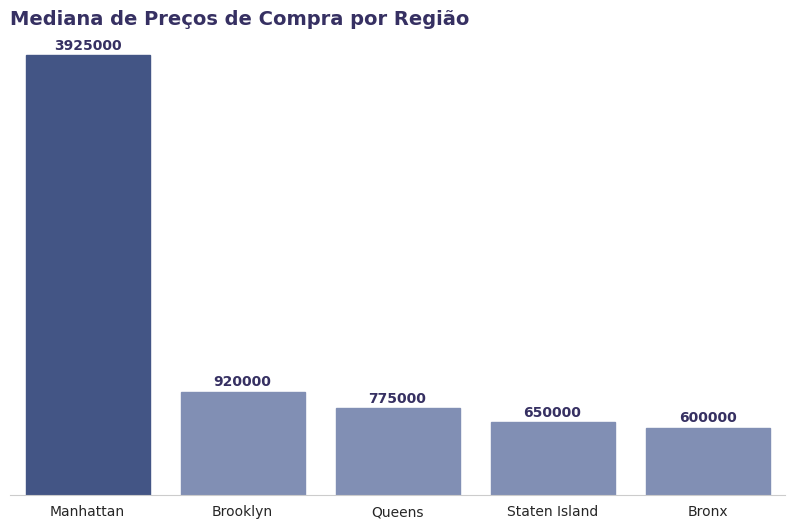

In [31]:
# @title
#Calculando a média do preço (price) para cada região
data_median_price = data_ny.groupby('BOROUGH')['MEDIAN SALE PRICE'].median().round(2).reset_index()

#Ordenando as regiões de forma decrescente
data_median_price = data_median_price.sort_values(by='MEDIAN SALE PRICE', ascending=False)

#Criando o gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=data_median_price, x='BOROUGH', y='MEDIAN SALE PRICE', estimator="sum", errorbar=None, color='#363062')
ax.bar_label(ax.containers[0], fontsize=10, padding=2, fontweight='bold', color='#363062', fmt='%d');

#Personalizando o gráfico
ax.set_title('Mediana de Preços de Compra por Região', loc='left', fontweight='bold', fontsize=14, color='#363062')
ax.set(xlabel=None,ylabel=None, yticklabels=[])

for bar in ax.patches: #Destacando cores
    if bar.get_height() > 1000000:
        bar.set_color('#435585')
    else:
        bar.set_color('#818FB4')

sns.despine(left=True)
ax.tick_params(left=False)
ax.grid(False, axis='both')

#Exibindo o gráfico
plt.show()

Agora que temos o valor mediano de compra de imóveis por região, vamos verificar nosso dataset original e verificar aluguel por valores e dias mínimos. Neste caso, vamos importar o dataset novamente, antes das transformações de dados que fizemos anteriormente.

In [32]:
data_ny2 = pd.read_csv('/content/alugueis_ny.csv', index_col=None)

In [33]:
data_ny2.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


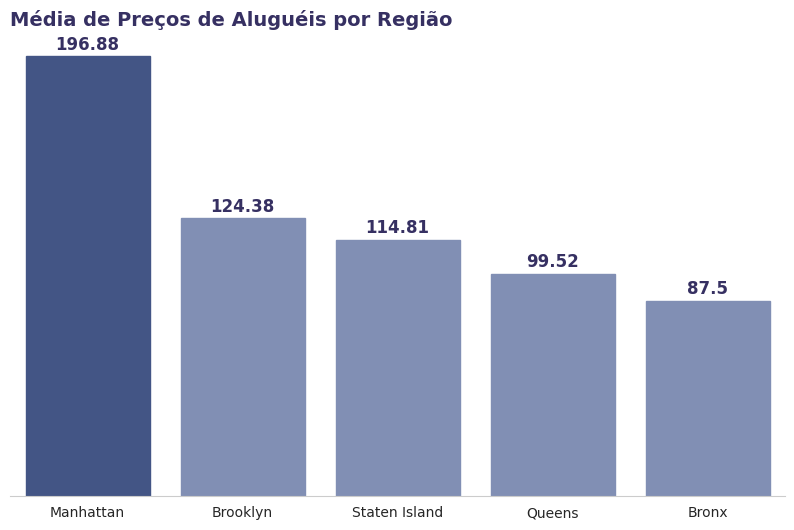

In [34]:
# @title
#Calculando a média do preço (price) para cada região
data_mean_price = data_ny2.groupby('bairro_group')['price'].mean().round(2).reset_index()

#Ordenando as regiões de forma decrescente
data_mean_price = data_mean_price.sort_values(by='price', ascending=False)

#Criando o gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=data_mean_price, x='bairro_group', y='price', estimator="sum", errorbar=None, color='#363062')
ax.bar_label(ax.containers[0], fontsize=12, padding=2, fontweight='bold', color='#363062');

#Personalizando o gráfico
ax.set_title('Média de Preços de Aluguéis por Região', loc='left', fontweight='bold', fontsize=14, color='#363062')
ax.set(xlabel=None,ylabel=None, yticklabels=[])
for bar in ax.patches: #Destacando cores
    if bar.get_height() > 150:
        bar.set_color('#435585')
    else:
        bar.set_color('#818FB4')

sns.despine(left=True)
ax.tick_params(left=False)
ax.grid(False, axis='both')

#Exibindo o gráfico
plt.show()

Agora, vamos calcular quantos dias de aluguel são necessários (de acordo com a média de aluguel em cada região) para pagar o investimento da compra do imóvel.

In [35]:
data_mean_price.sort_values(by='price', ascending=False)

,bairro_group,price
2,Manhattan,196.88
1,Brooklyn,124.38
4,Staten Island,114.81
3,Queens,99.52
0,Bronx,87.50


In [36]:
data_median_price.sort_values(by='MEDIAN SALE PRICE', ascending=False)

,BOROUGH,MEDIAN SALE PRICE
2,Manhattan,3925000.0
1,Brooklyn,920000.0
3,Queens,775000.0
4,Staten Island,650000.0
0,Bronx,600000.0


In [37]:
#Criando uma nova coluna que calcula quantos dias de aluguel são necessários para o investimento se pagar
data_median_price['dias_para_pagar_investimento'] = (data_median_price['MEDIAN SALE PRICE'] / data_mean_price['price']).round(0)
data_median_price.sort_values(by='dias_para_pagar_investimento', ascending=True)

,BOROUGH,MEDIAN SALE PRICE,dias_para_pagar_investimento
4,Staten Island,650000.0,5662.0
0,Bronx,600000.0,6857.0
1,Brooklyn,920000.0,7397.0
3,Queens,775000.0,7787.0
2,Manhattan,3925000.0,19936.0


**Com base nesses dados, observamos que Staten Island é a região mais atrativa para investimentos imobiliários, pois requer o menor número de dias de aluguel para pagar o valor investido no imóvel. Isso sugere que o mercado imobiliário em Staten Island pode oferecer retornos mais rápidos e eficientes para os investidores em comparação com outras regiões de Nova Iorque.**

## O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?

*Para responder esta pergunta, além de verificar um heatmap entre estas variáveis e o preço, também vamos criar um scatter plot para ambos os casos e analisá-los*


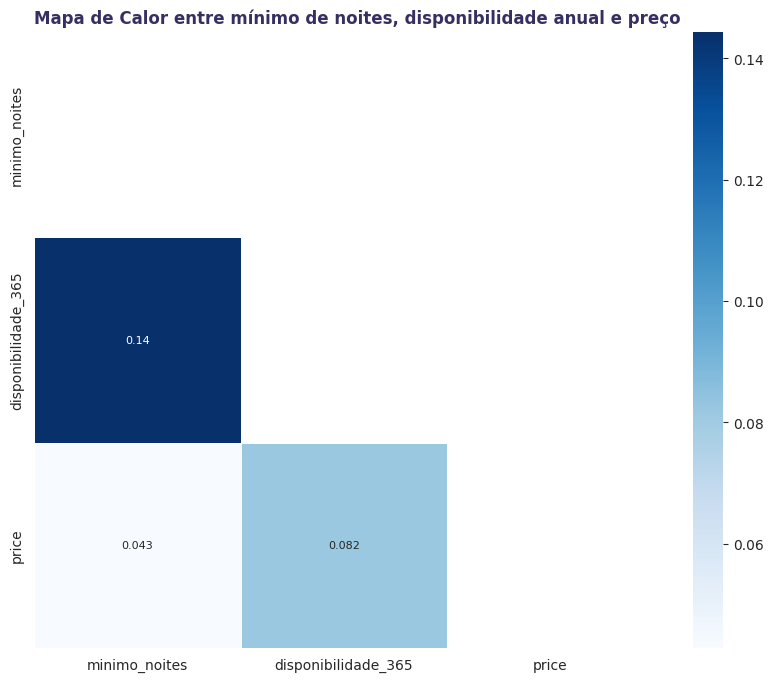

In [38]:
# @title
#Verificando correlação das features
corr_features = ['minimo_noites','disponibilidade_365', 'price']

plt.figure(figsize=(10, 8))
matriz_corr = data_ny2[corr_features].corr()
mask = np.triu(np.ones_like(matriz_corr, dtype=bool))
ax = sns.heatmap(matriz_corr, mask=mask, annot=True, cmap='Blues', linewidths=0.5,
            annot_kws={"size": 8})
ax.set_title('Mapa de Calor entre mínimo de noites, disponibilidade anual e preço', loc='left', fontweight='bold', fontsize=12, color='#363062')

plt.grid(False)
plt.show()

*Supondo que todas as regiões têm a mesma procura (mesma média de dias alugados), ao explorar a relação entre o número mínimo de noites (minimo_noites), a disponibilidade ao longo do ano (disponibilidade_365) e o preço do aluguel (price) no heatmap acima, observei as seguintes correlações:*

*- **Correlação de price com minimo_noites:** 0.043*

*- **Correlação de price com disponibilidade_365:** 0.082*


*Ambas as correlações de 0.043 (entre o número mínimo de noites e o preço) e 0.082 (entre a disponibilidade ao longo do ano e o preço) indicam uma correlação muito fraca. Isso sugere que, na amostra analisada, não há uma relação linear significativa entre o número mínimo de noites exigido para o aluguel e o preço.*


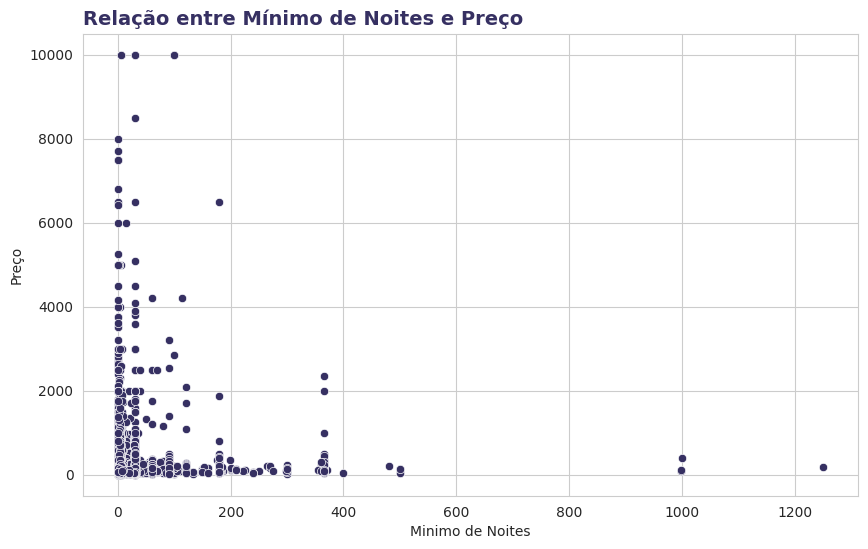

In [39]:
# @title
#Mínimo de noites x preço
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=data_ny2, x='minimo_noites', y='price', color='#363062')
ax.set_title('Relação entre Mínimo de Noites e Preço', loc='left', fontweight='bold', fontsize=14, color='#363062')
plt.xlabel('Minimo de Noites')
plt.ylabel('Preço')
plt.show()

*Ao visualizar o scatter plot acima, do número mínimo de noites (minimo_noites) com o preço do aluguel (price), verifiquei que a dispersão de pontos que não traz uma evidência de uma relação clara. A correlação de 0.043, indicada no heatmap, é consistente com a distribuição dos pontos no gráfico. A variação no preço não parece ser fortemente afetada pelo número mínimo de noites, e isso sugere uma correlação muito fraca entre essas variáveis.*

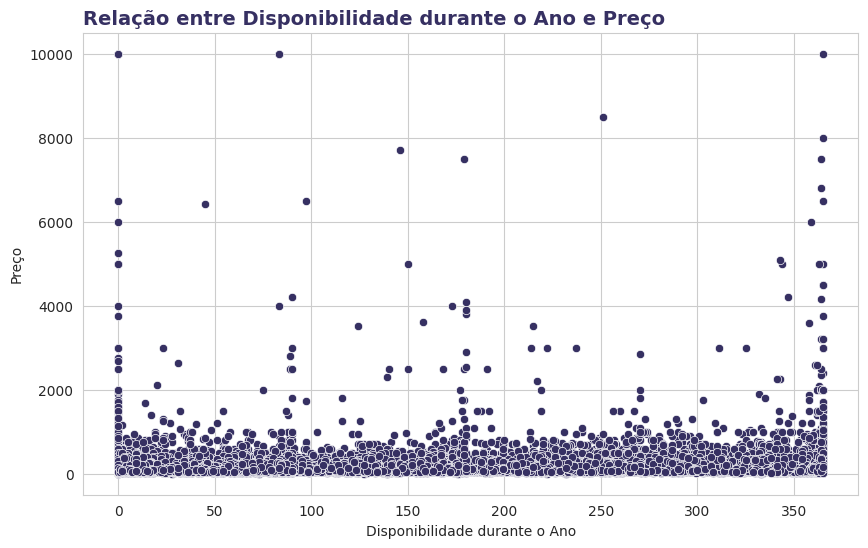

In [40]:
# @title
#Disponibilidade anual x preço
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=data_ny2, x='disponibilidade_365', y='price', color='#363062')
ax.set_title('Relação entre Disponibilidade durante o Ano e Preço', loc='left', fontweight='bold', fontsize=14, color='#363062')
plt.xlabel('Disponibilidade durante o Ano')
plt.ylabel('Preço')
plt.show()

*Assim como no scatter plot anterior relacionado ao número mínimo de noites, ao analisar o este, que relaciona a disponibilidade ao longo do ano (disponibilidade_365) com o preço do aluguel (price), percebemos uma dispersão de pontos que também não revela uma relação significativa, e que também sugere uma correlação muito fraca entre essas variáveis.*

## Existe algum padrão no texto do nome do local para lugares de mais alto valor?

*Para responder esta questão, vou criar um WordCloud (nuvem de palavras) para verificar quais são os termos mais comuns em locais com valores altos, e comparar com uma outra nuvem de palavras dos locais de valores baixos.*

*Para esta hipótese, considerei "valores altos" alugueis com valores acima do 75º percentil, e "valores baixos" abaixo do 25º percentil.*

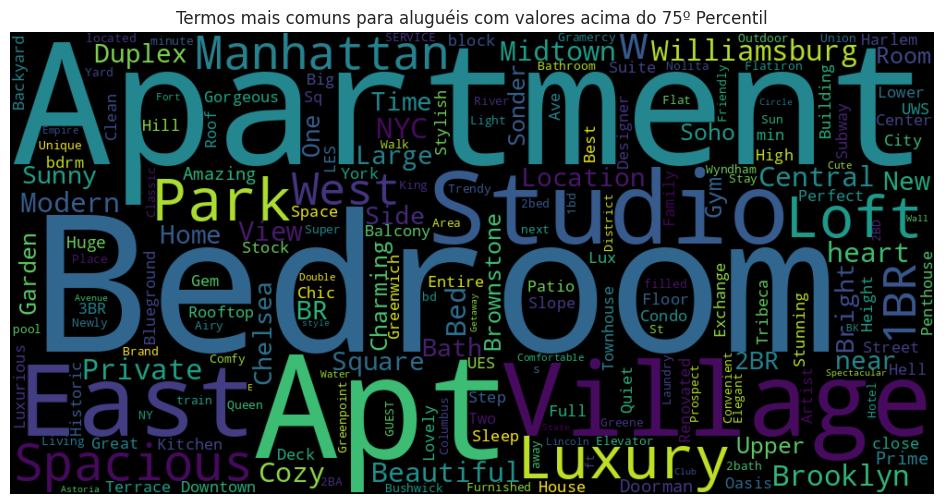

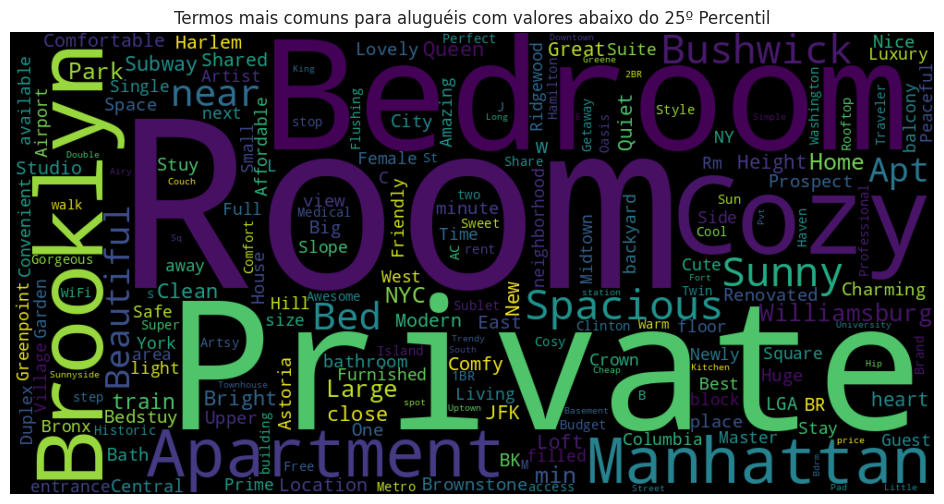

In [41]:
from wordcloud import WordCloud

#Convertendo valores para strings
data_ny2['nome'] = data_ny2['nome'].astype(str)

#Obtendo o 25º e 75º percentil
preco_75_percentil = data_ny2['price'].quantile(0.75)
preco_25_percentil = data_ny2['price'].quantile(0.25)

#Separando os dados em lugares com preço acima do 75º percentil
valores_altos_75_percentil = data_ny2[data_ny2['price'] > preco_75_percentil]
valores_baixos_25_percentil = data_ny2[data_ny2['price'] < preco_25_percentil]

#Exibindo a nuvem de palavras
def gerar_wordcloud(text_data, title):
    #Ajustando parâmetros da nuvem
    wordcloud = WordCloud(width=1000, height=500, background_color='black', contour_color='white', contour_width=2, max_words=200, collocations=False).generate(' '.join(text_data))

    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

#Criando nuvem de palavras para lugares com preço acima do 75º percentil
gerar_wordcloud(valores_altos_75_percentil['nome'], 'Termos mais comuns para aluguéis com valores acima do 75º Percentil')

#Criando nuvem de palavras para lugares de preço abaixo do 25º percentil
gerar_wordcloud(valores_baixos_25_percentil['nome'], 'Termos mais comuns para aluguéis com valores abaixo do 25º Percentil')

Com ambas as nuvens de palavras, podemos verificar que existem alguns termos que são mais comuns para aluguéis com valores mais altos, como:
- "Apartment" ou "Apt";
- "Village";
- "Studio";
- "East";
- "Park";
- "Spacious";
- "Luxury";
- Entre outros.

Isso indica que aluguéis com estas palavras normalmente possuem um valor mais elevado, pois normalmente significam que o aluguel é de um local inteiro (ao invés de somente um quarto, ou quarto compartilhado), luxuoso, local da cidade mais nobre, perto de algum parque (principalmente o Central Park, no caso de Nova Iorque), etc. Para comprovar esta hipótese, teriamos que testá-la em uma outra oportunidade.

Da mesma forma, existem algumas palavras mais comuns em locais com valores de alugueis mais baixos, como "Room", "Private", "Cozy", entre outros. Isto pode também indicar que locais com valores menores normalmente são quartos privados ou compartilhados, e em locais específicos da cidade. Mais uma vez, para comprovar esta hipótese, também teríamos que testá-la.

Por fim, existem termos que são comuns em ambos os casos, como por exemplo "Bedroom", "Spacious". Isto indica que estas não têm muita correlação com o valor do local.

## Explique como você faria a previsão do preço a partir dos dados.
**Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?**

*Para prever o preço a partir dos dados, utilizamos um modelo de regressão, pois estamos interessados em estimar um valor contínuo (o preço do aluguel).*

*A escolha das variáveis e suas transformações foi feita com base na relevância para prever o preço do aluguel. Utilizamos variáveis como "bairro_group", "bairro", "latitude", "longitude", "room_type", "price", "minimo_noites", "numero_de_reviews" e "reviews_por_mes". Transformamos "bairro_group" em "regiao" para uma melhor interpretação e aplicamos one hot encoding nas variáveis categóricas "regiao", "bairro" e "room_type" para convertê-las em formato numérico, facilitando o treinamento do modelo. Além disso, tratamos dados nulos e removemos colunas irrelevantes para o treinamento do modelo.*

*O modelo que melhor se aproximou dos dados foi o Gradient Boosting Regressor. Seus principais pontos positivos incluem:*

- *Alta capacidade de predição, como evidenciado pelo R² de 0.1334.*
- *Boa capacidade de lidar com dados não lineares e interações entre variáveis.*

*No entanto, alguns pontos negativos podem incluir:*

- *Sensível a overfitting se não forem ajustados adequadamente os hiperparâmetros.*
- *Pode ser computacionalmente mais exigente em comparação com alguns outros modelos devido à construção sequencial de árvores.*

*A medida de performance escolhida para avaliar os modelos foi o R² (coeficiente de determinação). Optamos por essa métrica porque ela indica a proporção da variância na variável dependente (preço) que é explicada pelas variáveis independentes (características do imóvel). Quanto mais próximo de 1 o R², melhor o modelo explica os dados. Além disso, também avaliamos métricas como MAE (Erro Absoluto Médio), MSE (Erro Quadrático Médio) e RMSE (Raiz do Erro Quadrático Médio) para uma compreensão abrangente do desempenho do modelo.*


## Qual seria a sua sugestão de preço?

Supondo um apartamento com as seguintes características:

```Python
{'id': 2595,
 'nome': 'Skylit Midtown Castle',
 'host_id': 2845,
 'host_name': 'Jennifer',
 'bairro_group': 'Manhattan',
 'bairro': 'Midtown',
 'latitude': 40.75362,
 'longitude': -73.98377,
 'room_type': 'Entire home/apt',
 'price': 225,
 'minimo_noites': 1,
 'numero_de_reviews': 45,
 'ultima_review': '2019-05-21',
 'reviews_por_mes': 0.38,
 'calculado_host_listings_count': 2,
 'disponibilidade_365': 355}
```

In [42]:
novo_df = {'id': 2595,
 'nome': 'Skylit Midtown Castle',
 'host_id': 2845,
 'host_name': 'Jennifer',
 'bairro_group': 'Manhattan',
 'bairro': 'Midtown',
 'latitude': 40.75362,
 'longitude': -73.98377,
 'room_type': 'Entire home/apt',
 'price': 225,
 'minimo_noites': 1,
 'numero_de_reviews': 45,
 'ultima_review': '2019-05-21',
 'reviews_por_mes': 0.38,
 'calculado_host_listings_count': 2,
 'disponibilidade_365': 355}

In [43]:
sugestao_preco = pd.DataFrame(novo_df, index=[0])

In [44]:
sugestao_preco

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [45]:
sugestao_preco.rename(columns={'bairro_group':'regiao'}, inplace=True)

In [46]:
#Removendo features desnecessárias
columns_to_drop = ['nome', 'host_name', 'host_id', 'id', 'ultima_review']
sugestao_preco = sugestao_preco.drop(columns_to_drop, axis=1)

In [47]:
#Transformando dados nulos em 0
sugestao_preco['reviews_por_mes'].fillna(0, inplace=True)

In [48]:
sugestao_preco

,regiao,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355


In [49]:
sugestao_preco = preprocessing.transform(sugestao_preco)

In [50]:
gradient_boosting.predict(sugestao_preco)

array([312.41014968])

# Exportando o modelo

Aqui, exportaremos o modelo, e os requerimentos para utilização em situações futuras.

In [69]:
import pickle

pickle.dump(gradient_boosting, open('gbr_aluguel_ny.pkl', 'wb'))